Primero vamos a proceder importando las librerias que vamos a usar en el desarrollo de la práctica

In [20]:
from skimage import io, transform, color
from skimage.exposure import match_histograms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

Para comenzar con el preprocesamiento de las imagenes primero vamos a clonar el repositorio en el que estan las imagenes para poder trabajar en local.

In [3]:
os.system("git clone https://github.com/Kekon130/ML_Practica3.git") 

0

Ahora vamos a meter las imagenes en un array para poder acceder de forma fácila a ellas.

In [11]:
ruta_train = "./ML_Practica3/train"
ruta_test = "./ML_Practica3/test"

df_train = []
img_size = 80

for img in os.listdir(ruta_train):
  img_normal = io.imread(os.path.join(ruta_train, img))
  img_resize = transform.resize(img_normal, output_shape=(img_size, img_size))
  df_train.append(img_normal)
  

A continuación vamos a proceder a igualar todas las imagenes en base a una que elegiremos aleatoriamente y posteriormente las ejaremos en escala
de grises.

In [12]:
referencia = df_train[5]
for img in range(len(df_train)):
  aux = match_histograms(df_train[img], referencia, multichannel= True)
  df_train[img] = color.rgb2gray(aux)

C:\Users\sergi\AppData\Local\Temp\ipykernel_11752\3231391681.py:3: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  aux = match_histograms(df_train[img], referencia, multichannel= True)


Habiendo termiando ya el preprocesamiento procedemos a probar modelos de clusterización.

Primero debemos pasar el formato de las imagenes a un array unidimensional

In [18]:
for img in range(len(df_train)):
  df_train[img] = df_train[img].ravel()

[0.68815059 0.90807059 0.92094275 ... 0.30379843 0.68732431 0.69267451]


In [22]:
kmeans = KMeans(n_clusters= 5, max_iter= 100, random_state= 0)
kmeans.fit(df_train)

KMeans(max_iter=100, n_clusters=5, random_state=0)

He hecho una prueba a ver qué salía con una

C:\Users\sergi\AppData\Local\Temp\ipykernel_11752\927195263.py:4: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  match = match_histograms (imagen_de_prueba, referencia, multichannel = True)


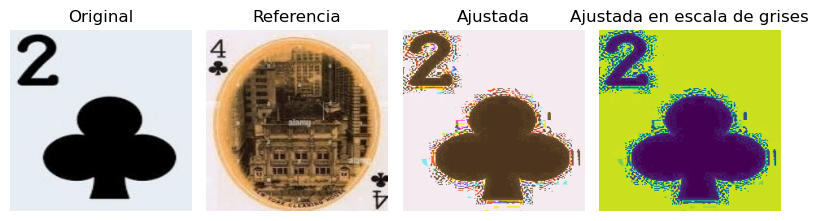

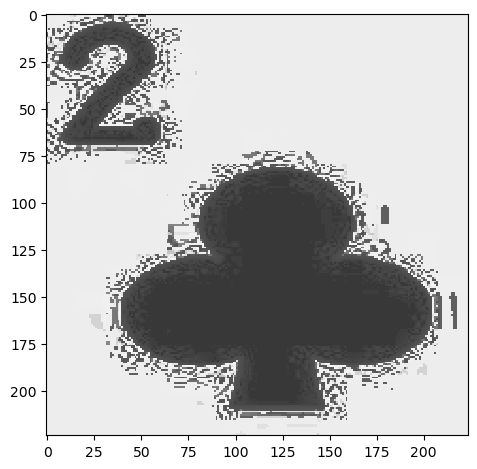

In [6]:
referencia = df_train[5]
imagen_de_prueba = df_train[1]

match = match_histograms (imagen_de_prueba, referencia, multichannel = True)
match_escala_de_grises = color.rgb2gray(match)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(8, 3), sharex=True, sharey=True)
for aa in (ax1, ax2, ax3, ax4):
    aa.set_axis_off()

ax1.imshow(imagen_de_prueba)
ax1.set_title('Original')
ax2.imshow(referencia)
ax2.set_title('Referencia')
ax3.imshow(match)
ax3.set_title('Ajustada')
ax4.imshow(match_escala_de_grises)
ax4.set_title('Ajustada en escala de grises')

plt.tight_layout()
plt.show()

io.imshow(match_escala_de_grises)
